In [1]:
#import all important libraries
import glob
import pandas as pd
import pandas_profiling
import numpy as np
import datetime as dt
import ast 
import re
import math 
import os
#import jupyter_contrib_nbextensions

#ignore warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#Exploratory Data Analysis 
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning

#Hypothesis testing
from scipy.stats import ttest_ind

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Cross Validation
from sklearn import model_selection

#Linear Regression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

#Decision Trees
from sklearn.tree import DecisionTreeRegressor
#from sklearn.cross_validation import cross_val_score, crossvalidation
from sklearn.model_selection import cross_val_score, ShuffleSplit
#from sklearn.model_selection import crossvalidation

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# import glob
# #Reading multiple files
# path = "DS-Unit-4-Sprint-3-Deep-Learning/BuildWeek/"
# all_files = glob.glob(path + "/*.csv")

# files = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     files.append(df)

# frame = pd.concat(files, axis=0, ignore_index=True)

# #Preview Data
# df.head()

In [3]:
#df.to_csv(r'TheKickStaterFile.csv', index = False)

In [4]:
df = pd.read_csv('TheKickStaterFile.csv', index_col=None, header=0)

In [5]:
df_kickstarter = df[["state","id","created_at","launched_at","deadline","category","country","currency","current_currency","fx_rate","static_usd_rate","goal","usd_pledged","location","backers_count","urls"]]
df_kickstarter.head()

,state,id,created_at,launched_at,deadline,category,country,currency,current_currency,fx_rate,static_usd_rate,goal,usd_pledged,location,backers_count,urls
0,failed,1852942336,1460365818,1461689339,1464799739,"{""id"":336,""name"":""Flight"",""analytics_name"":""Fl...",GB,GBP,USD,1.406145,1.443545,70000,3077.638196,"{""id"":26062,""name"":""Leicester"",""slug"":""leicest...",53,"{""web"":{""project"":""https://www.kickstarter.com..."
1,failed,1719576411,1563902263,1564136442,1566421500,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",IT,EUR,USD,1.207659,1.113516,2200,1.113516,"{""id"":718345,""name"":""Milan"",""slug"":""milan-mila...",1,"{""web"":{""project"":""https://www.kickstarter.com..."
2,failed,2026676571,1561559329,1562099315,1564691315,"{""id"":337,""name"":""Gadgets"",""analytics_name"":""G...",US,USD,USD,1.000000,1.000000,10000,71.000000,"{""id"":2466256,""name"":""Orlando"",""slug"":""orlando...",4,"{""web"":{""project"":""https://www.kickstarter.com..."
3,failed,361054958,1487084401,1487358488,1489672800,"{""id"":282,""name"":""Festivals"",""analytics_name"":...",CA,CAD,USD,0.824313,0.765669,2000,0.000000,"{""id"":4118,""name"":""Toronto"",""slug"":""toronto-on...",0,"{""web"":{""project"":""https://www.kickstarter.com..."
4,successful,1039424225,1447144365,1456830011,1459449840,"{""id"":341,""name"":""Wearables"",""analytics_name"":...",US,USD,USD,1.000000,1.000000,75000,102066.000000,"{""id"":906057,""name"":""Stockholm"",""slug"":""stockh...",1042,"{""web"":{""project"":""https://www.kickstarter.com..."


In [6]:
print(df_kickstarter.dtypes)

#factor conversions
df_kickstarter['id'] = df_kickstarter['id'].astype(object)

state                object
id                    int64
created_at            int64
launched_at           int64
deadline              int64
category             object
country              object
currency             object
current_currency     object
fx_rate             float64
static_usd_rate     float64
goal                  int64
usd_pledged         float64
location             object
backers_count         int64
urls                 object
dtype: object


In [7]:
#date conversions
df_kickstarter["created_at"] = pd.to_datetime(df_kickstarter["created_at"],unit='s')
df_kickstarter["created_at"]= df_kickstarter["created_at"].dt.date

df_kickstarter["launched_at"] = pd.to_datetime(df_kickstarter["launched_at"],unit='s')
df_kickstarter["launched_at"]= df_kickstarter["launched_at"].dt.date

df_kickstarter["deadline"] = pd.to_datetime(df_kickstarter["deadline"],unit='s')
df_kickstarter["deadline"]= df_kickstarter["deadline"].dt.date

#Splitting Created_at date into year and month 
df_kickstarter[['lauchedat_year','lauchedat_month']] = df_kickstarter.launched_at.apply(lambda x : pd.Series(x.strftime("%Y,%m").split(",")))
df_kickstarter[['deadline_year','deadline_month']] = df_kickstarter.deadline.apply(lambda x : pd.Series(x.strftime("%Y,%m").split(",")))

df_kickstarter["launched_at"] = pd.to_datetime(df_kickstarter["launched_at"])
df_kickstarter["deadline"] = pd.to_datetime(df_kickstarter["deadline"])
df_kickstarter["created_at"] = pd.to_datetime(df_kickstarter["created_at"])

df_kickstarter['month_deadline'] = pd.to_datetime(df_kickstarter['deadline'], format='%m').dt.month_name().str.slice(stop=3)
df_kickstarter['month_launched'] = pd.to_datetime(df_kickstarter['launched_at'], format='%m').dt.month_name().str.slice(stop=3)

In [8]:
# looping all records and extracting category
array_cat = df_kickstarter["category"].values
rows = len(array_cat)
i=0
#array_cat_names=[]
category=[]
sub_category=[]
print(rows)
print(i)


while i <=(rows-1):
    str_temp = array_cat[i]
    tuple_temp = ast.literal_eval(str_temp)
    dict_temp = dict(tuple_temp)
 #   print(dict_temp["name"])
 #   array_cat_names.append(dict_temp["name"])
    if('/' in dict_temp['slug']):
        cat = dict_temp["slug"].split('/',2)
        category.append(cat[0])
        sub_category.append(cat[1])
    else :
        category.append(dict_temp['slug'])
        sub_category.append(dict_temp['slug'])
    i=i+1
#    print(i)

#drop old category
df_kickstarter = df_kickstarter.drop(columns="category")

#insert new category
df_kickstarter.insert(4,"category",category)
df_kickstarter.insert(5,"sub_category",sub_category)


3663
0


In [9]:
#calculating number of days
no_days=df_kickstarter['deadline']-df_kickstarter['launched_at']

#inserting timeline
df_kickstarter.insert(4,"timeline",no_days.dt.days)

In [10]:
#currency conversion
usd_goal = df_kickstarter['goal'] * df_kickstarter['static_usd_rate']
df_kickstarter.insert(13,"usd_goal",usd_goal) 

# Scale the pledged amount and goal for interpretable plots and stats

df_kickstarter['usd_pledged'] = df_kickstarter['usd_pledged']/1000
df_kickstarter['usd_goal'] =  df_kickstarter['usd_goal'] / 1000

In [11]:
# looping all records and extracting location
array_loc = df_kickstarter["location"].values
rows = len(array_loc)
i=0
array_loc_names=[]
print(rows)
print(i)


while i <=(rows-1):
    if( pd.isnull(array_loc[i]) ):
        array_loc_names.append('NA')
        i=i+1
    else:
        loc=re.search('"name":"(.*)","slug"',array_loc[i])
        array_loc_names.append(loc.group(1))
        i=i+1
        
len(array_loc_names)  

#drop old location
df_kickstarter = df_kickstarter.drop(columns="location")

#insert new location
df_kickstarter.insert(6,"city",array_loc_names)

3663
0


In [12]:
#extract URL
print(df_kickstarter["urls"].head())

# looping all records and extracting urls
array_url = df_kickstarter["urls"].values
rows = len(array_url)
i=0
#array_cat_names=[]
web_url=[]
rewards_url=[]
print(rows)
print(i)


while i <=(rows-1):
    str_temp = array_url[i]
    tuple_temp = ast.literal_eval(str_temp)
    dict_temp = dict(tuple_temp)
 #   print(dict_temp["name"])
 #   array_cat_names.append(dict_temp["name"])
    web_url.append(dict_temp['web']['project'])
    rewards_url.append(dict_temp['web']['rewards'])
    i=i+1
#    print(i)

print(len(web_url))
print(len(rewards_url))

#insert the URLS
df_kickstarter.insert(14,"web_url",web_url) 
df_kickstarter.insert(15,"rewards_url",rewards_url) 

df_kickstarter = df_kickstarter.drop(columns="urls")

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object
3663
0
3663
3663


In [13]:
# Preview cleaned data and save into a file
df_kickstarter.head()

,state,id,created_at,launched_at,timeline,category,city,sub_category,deadline,country,...,usd_goal,goal,usd_pledged,backers_count,lauchedat_year,lauchedat_month,deadline_year,deadline_month,month_deadline,month_launched
0,failed,1852942336,2016-04-11,2016-04-26,36,technology,Leicester,flight,2016-06-01,GB,...,101.048158,70000,3.077638,53,2016,04,2016,06,Jun,Apr
1,failed,1719576411,2019-07-23,2019-07-26,26,technology,Milan,software,2019-08-21,IT,...,2.449736,2200,0.001114,1,2019,07,2019,08,Aug,Jul
2,failed,2026676571,2019-06-26,2019-07-02,30,technology,Orlando,gadgets,2019-08-01,US,...,10.000000,10000,0.071000,4,2019,07,2019,08,Aug,Jul
3,failed,361054958,2017-02-14,2017-02-17,27,theater,Toronto,festivals,2017-03-16,CA,...,1.531337,2000,0.000000,0,2017,02,2017,03,Mar,Feb
4,successful,1039424225,2015-11-10,2016-03-01,30,technology,Stockholm,wearables,2016-03-31,US,...,75.000000,75000,102.066000,1042,2016,03,2016,03,Mar,Mar


In [14]:
#Removing Duplicates
# Sort by Project ID
df_kickstarter.sort_values('id',inplace=True)

# Drop the duplicateds
df_kickstarter.drop_duplicates(subset='id',keep='first', inplace=True)

#Check the final count
print("Dimensions after removing duplicates")
print(df_kickstarter.shape)
df_clean1 = df_kickstarter[['state','category','sub_category','country','launched_at','timeline','usd_goal','usd_pledged','backers_count']].head()

Dimensions after removing duplicates
(3659, 26)


In [15]:
df_clean1['state'].unique()

array(['successful'], dtype=object)

In [16]:
#stats : Successful projects
df_success = df_kickstarter[['usd_goal','category','timeline','sub_category']].describe()

In [17]:
df_success

,usd_goal,timeline
count,3659.000000,3659.00000
mean,30.853722,33.94698
std,226.279761,12.37698
min,0.001000,1.00000
25%,2.000000,30.00000
50%,5.292747,30.00000
75%,15.000000,37.00000
max,10000.000000,89.00000


In [18]:
#stats : Failed projects
df_fail = df_kickstarter[['usd_goal','category','timeline','sub_category']].describe()

In [19]:
df_fail

,usd_goal,timeline
count,3659.000000,3659.00000
mean,30.853722,33.94698
std,226.279761,12.37698
min,0.001000,1.00000
25%,2.000000,30.00000
50%,5.292747,30.00000
75%,15.000000,37.00000
max,10000.000000,89.00000


In [20]:
#test

ttest, pval = ttest_ind(df_success['usd_goal'], df_fail['usd_goal'])
print("Ttest for goal amounts of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


#ttest, pval = ttest_ind(df_success['usd_pledged'], df_fail['usd_pledged'])
print("\nTtest for pledged amounts of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)


#ttest, pval = ttest_ind(df_success['backers_count'], df_fail['backers_count'])
print("\nTtest for Backers count of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

ttest, pval = ttest_ind(df_success['timeline'], df_fail['timeline'])
print("\nTtest for timeline of Successful and Failed Projects")
print("p-value : ",pval)
print("ttest : ",ttest)

Ttest for goal amounts of Successful and Failed Projects
p-value :  1.0
ttest :  0.0

Ttest for pledged amounts of Successful and Failed Projects
p-value :  1.0
ttest :  0.0

Ttest for Backers count of Successful and Failed Projects
p-value :  1.0
ttest :  0.0

Ttest for timeline of Successful and Failed Projects
p-value :  1.0
ttest :  0.0


Training Accuracy : 62.73%
Actuals     canceled  failed  live  successful
Predicted                                     
failed             7      75     2          46
successful        22     198     9         373
Testing Accuracy:  0.6120218579234973
              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00         0
      failed       0.27      0.58      0.37       130
        live       0.00      0.00      0.00         0
  successful       0.89      0.62      0.73       602

    accuracy                           0.61       732
   macro avg       0.29      0.30      0.28       732
weighted avg       0.78      0.61      0.67       732



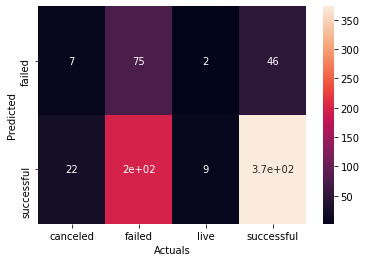

In [21]:
# Logistic regression with cross validation
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

for col in ["category","sub_category"]:
    df_kickstarter[col] = LabelEncoder().fit_transform(df_kickstarter[col])


#Enc.fit(df_kickstarter['category'])
#Enc.fit(df_kickstarter['sub_category'])

train, test = train_test_split(df_kickstarter, test_size=0.2, random_state=0)

kfold = model_selection.KFold(n_splits = 10, random_state=0, shuffle=True)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, train[['usd_goal','category','timeline','sub_category']], train['state'], cv=kfold)
print("Training Accuracy : %.2f%%" % (results_kfold.mean()*100.0))
#print(results_kfold)
#print(results_kfold.cv)

results_kfold_pred = model_selection.cross_val_predict(model_kfold, test[['usd_goal','category','timeline','sub_category']], test['state'], cv=kfold)
#print("Accuracy : %.2f%%" % (results_kfold_pred.mean()*100.0))
#print(results_kfold_pred)
confusion_matrix_cv = pd.crosstab( results_kfold_pred, test['state'], rownames=['Predicted'], colnames=['Actuals'])
print(confusion_matrix_cv)
print('Testing Accuracy: ',metrics.accuracy_score(test['state'], results_kfold_pred))
#print("Misclassification on Test data : ", metrics.classification_report )

sns.heatmap(confusion_matrix_cv, annot=True)

#Classification report
print(classification_report( results_kfold_pred,test['state']))

In [22]:
#Building Decision Tree
from sklearn.tree import DecisionTreeClassifier

train, test = train_test_split(df_kickstarter, test_size=0.2, random_state=0)

X= train[['usd_goal','category','timeline','sub_category']]
y= train['state']

dtreeclass = DecisionTreeClassifier()

dtreeclass = dtreeclass.fit(X, y)

X_test = test[['usd_goal','category','timeline','sub_category']]
y_test = test['state']

y_pred = dtreeclass.predict(X_test)

print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.610655737704918


In [23]:
# setting X and Y
feature =["state"]
y = df_kickstarter[feature]
feature =['usd_goal','category','timeline','sub_category']
X = df_kickstarter[feature]

#spliting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# KNN for 10 neighhbours
classifier = KNeighborsClassifier(n_neighbors=21)
classifier.fit(X_train, y_train)

# predict for test data
y_pred = classifier.predict(X_test)

# accuracy of prediction
print(metrics.accuracy_score(y_test, y_pred))

#Classification matrix
print(confusion_matrix( y_pred,y_test, labels=['successful','failed'] ))
#confusion_matrix_knn = pd.crosstab( y_pred, y_test, rownames=['Predicted'], colnames=['Actuals'])
#print(confusion_matrix_knn)
print(classification_report( y_pred,y_test))

0.6229508196721312
[[302 143]
 [ 86 154]]
              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00         0
      failed       0.52      0.58      0.55       265
        live       0.00      0.00      0.00         0
  successful       0.78      0.65      0.71       467

    accuracy                           0.62       732
   macro avg       0.32      0.31      0.31       732
weighted avg       0.68      0.62      0.65       732



Text(0, 0.5, 'Testing Accuracy')

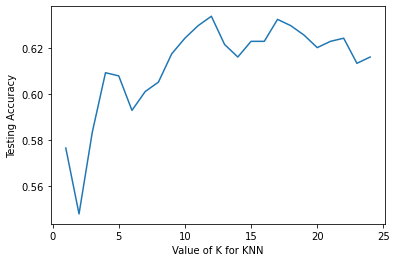

In [24]:
#optimal k

# try K=1 through K=25 and record testing accuracy
k_range = range(1, 25)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

#print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [27]:
# Creating dummy variables
dummy_category=pd.get_dummies(df_kickstarter['category'])
dummy_category.head()

#creating a dataset for Random Forest
df_forest=df_kickstarter[['usd_goal','category','timeline','sub_category','state']]
df_forest=pd.concat([df_forest, dummy_category.reindex(df_forest.index)], axis=1)
print(df_forest.shape)
df_forest.head()

df_forest_stateless=df_forest[['usd_goal','category','timeline','sub_category']]
df_forest_stateless=pd.concat([df_forest_stateless, dummy_category.reindex(df_forest_stateless.index)], axis=1)
print(df_forest_stateless.shape)
df_forest_stateless.head()

(3659, 14)
(3659, 13)


NameError: name 'df_forest_nostate' is not defined

In [ ]:
#Model Evaluation

X = df_forest_stateless
y = df_forest['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

#Fit the model
rf=RandomForestClassifier(n_estimators=1000,max_depth=None,max_features='auto')

#Model Evaluation
rf.fit(X_train, y_train)
yhat=rf.predict(X_test)
accuracy_score(y_test,yhat)

In [ ]:
#model Building
from numpy import loadtxt
from xgboost.sklearn import XGBClassifier  

y = df_forest['state']
X = df_forest_stateless
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from numpy import loadtxt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train)

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
from joblib import dump
dump(model, 'model.joblib', compress=True)

In [ ]:
y_pred

In [ ]:
X_test.columns

In [ ]:
# df = pd.DataFrame(columns=['usd_goal', 'category', 'timeline', 'sub_category',], 
# data=[[usd_goal, category, timeline, sub_category]])
# y_pred = model.predict(df)[0],
# print ("The State is: {}!".format(y_pred))